In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

In [4]:
results = []

### Unstructured Variance, n_input = 12, n_output = 1

In [5]:
df = pd.read_excel("Data/US12I1O.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Output 01
DMU 0001,288.81,493.46,202.31,356.18,384.45,653.77,129.40,100.28,38.45,306.59,92.41,250.91,250.77
DMU 0002,349.98,420.00,139.32,312.89,543.04,504.54,120.43,177.65,86.96,330.87,79.16,201.81,372.71
DMU 0003,280.78,452.42,127.85,315.42,559.22,466.35,166.57,165.57,81.43,359.75,83.23,246.78,293.40
DMU 0004,405.33,376.32,237.28,451.43,414.19,318.03,187.77,154.65,49.71,316.82,97.74,344.70,462.69
DMU 0005,348.96,426.79,170.01,292.91,502.76,342.94,146.53,165.78,63.80,329.79,76.17,355.61,374.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,206.54,333.40,274.01,424.09,465.99,548.04,143.02,58.25,49.65,355.16,85.54,238.49,279.23
DMU 0997,328.82,415.09,121.60,268.46,494.32,454.22,150.96,143.44,65.04,374.88,69.81,261.57,344.45
DMU 0998,310.52,565.44,126.06,320.91,463.01,390.07,151.81,202.55,101.67,333.12,87.52,328.13,320.62
DMU 0999,390.34,255.88,209.15,269.76,576.57,261.14,162.39,102.92,66.70,401.16,72.50,318.26,380.24


In [6]:
df_sol = pd.read_excel("US12I1O_gradientboostingregressor_Solution_2.xlsx", index_col=0)[["Efficiency_Scores"]]
df_sol

,Efficiency_Scores
DMU 0001,0.427745
DMU 0002,0.615526
DMU 0003,0.543690
DMU 0004,0.734761
DMU 0005,0.648628
...,...
DMU 0996,0.557580
DMU 0997,0.605462
DMU 0998,0.568780
DMU 0999,0.688266


In [7]:
import mitosheet
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-89d196a2-ce53-4016-b3fa-5ba72c84625f", "code": {"imports…

In [8]:
df_weights = pd.read_excel("US12I1O_gradientboostingregressor_Solution_2.xlsx", index_col=0).iloc[:, 1:]
df_weights

,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Output 01
DMU 0001,0.001306,0.000000,0.000287,0.000287,0.000287,0.000287,0.000287,0.000287,0.000000,0.000000,0.000287,0.000287,0.001706
DMU 0002,0.001221,0.000000,0.000419,0.000320,0.000000,0.000419,0.000320,0.000419,0.000000,0.000000,0.000320,0.000320,0.001651
DMU 0003,0.001579,0.000000,0.000583,0.000000,0.000000,0.000583,0.000000,0.000583,0.000000,0.000000,0.000000,0.000460,0.001853
DMU 0004,0.001506,0.000000,0.000000,0.000000,0.000000,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001588
DMU 0005,0.001360,0.000000,0.000774,0.000000,0.000000,0.000774,0.000000,0.000774,0.000000,0.000000,0.000000,0.000000,0.001733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.001970,0.000005,0.000482,0.000005,0.000005,0.000556,0.000005,0.000556,0.000005,0.000005,0.000005,0.000482,0.001997
DMU 0997,0.001297,0.000000,0.000398,0.000258,0.000188,0.000398,0.000258,0.000398,0.000000,0.000000,0.000258,0.000258,0.001758
DMU 0998,0.001396,0.000000,0.000628,0.000085,0.000085,0.000628,0.000085,0.000628,0.000000,0.000000,0.000085,0.000085,0.001774
DMU 0999,0.001180,0.000000,0.000545,0.000000,0.000000,0.001180,0.000000,0.001142,0.000000,0.000000,0.000000,0.000000,0.001810


In [9]:
df_zero =(df_weights==0).sum()
df_zero

Weight_Input 01       0
Weight_Input 02     879
Weight_Input 03      57
Weight_Input 04     286
Weight_Input 05     455
Weight_Input 06       1
Weight_Input 07     343
Weight_Input 08      18
Weight_Input 09     909
Weight_Input 10     620
Weight_Input 11     357
Weight_Input 12     229
Weight_Output 01      0
dtype: int64

### ML

In [10]:
X = df
X.head()

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Output 01
DMU 0001,288.81,493.46,202.31,356.18,384.45,653.77,129.40,100.28,38.45,306.59,92.41,250.91,250.77
DMU 0002,349.98,420.00,139.32,312.89,543.04,504.54,120.43,177.65,86.96,330.87,79.16,201.81,372.71
DMU 0003,280.78,452.42,127.85,315.42,559.22,466.35,166.57,165.57,81.43,359.75,83.23,246.78,293.40
DMU 0004,405.33,376.32,237.28,451.43,414.19,318.03,187.77,154.65,49.71,316.82,97.74,344.70,462.69
DMU 0005,348.96,426.79,170.01,292.91,502.76,342.94,146.53,165.78,63.80,329.79,76.17,355.61,374.18


In [11]:
y = df_sol
y.head()

,Efficiency_Scores
DMU 0001,0.427745
DMU 0002,0.615526
DMU 0003,0.543690
DMU 0004,0.734761
DMU 0005,0.648628


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [14]:
dt_model = DecisionTreeRegressor(random_state=42)

pipe_dt = make_pipeline(std_scaler, dt_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe_dt, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe_dt, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe_dt, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.00241567649780203
neg_root_mean_squared_error: -0.04885773931344898
r2: 0.8085083176359493


In [15]:
# specify parameter values to search
params = {}
params['decisiontreeregressor__max_depth'] = list(range(1, 15))
params['decisiontreeregressor__min_samples_split'] = list(range(10, 60, 10))
params['decisiontreeregressor__max_features'] = ["auto","log2","sqrt",None]

In [16]:
grid = GridSearchCV(pipe_dt, params, cv=5, scoring="neg_root_mean_squared_error")
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14],
                         'decisiontreeregressor__max_features': ['auto', 'log2',
                                                                 'sqrt', None],
                         'decisiontreeregressor__min_samples_split': [10, 20,
                                                                      30, 40,
                                                                      50]},
             scoring='neg_root_mean_squared_error')

In [17]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("r2:", cross_val_score(grid.best_estimator_, X, y, scoring="r2").mean())

-0.04566507577856786
{'decisiontreeregressor__max_depth': 11, 'decisiontreeregressor__max_features': 'auto', 'decisiontreeregressor__min_samples_split': 20}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=11, max_features='auto',
                                       min_samples_split=20,
                                       random_state=42))])
r2: 0.833648477203927


In [18]:
imp_dt = grid.best_estimator_.steps[1][1].feature_importances_
imp_dt

array([0.1 , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.81])

In [19]:
#pipe_dt.fit(X, y)
#
#imp_dt = pipe_dt.steps[1][1].feature_importances_
#imp_dt

In [20]:
df_dt = pd.DataFrame({"Feature Name":X.columns, "Importance": imp_dt}).sort_values("Importance", ascending=False)
df_dt

,Feature Name,Importance
12,Output 01,0.811424
0,Input 01,0.101677
5,Input 06,0.073797
4,Input 05,0.002779
6,Input 07,0.002279
...,...,...
3,Input 04,0.000999
7,Input 08,0.000819
1,Input 02,0.000611
8,Input 09,0.000081


In [21]:
input_imp = list(df_dt.loc[df_dt["Feature Name"].str.contains("Input"), "Feature Name"].values)
results.append((grid.best_estimator_.steps[1][0], input_imp,
                {"r2" : cross_val_score(grid.best_estimator_, X, y, scoring="r2").mean(),
                "neg_root_mean_squared_error": grid.best_score_}))

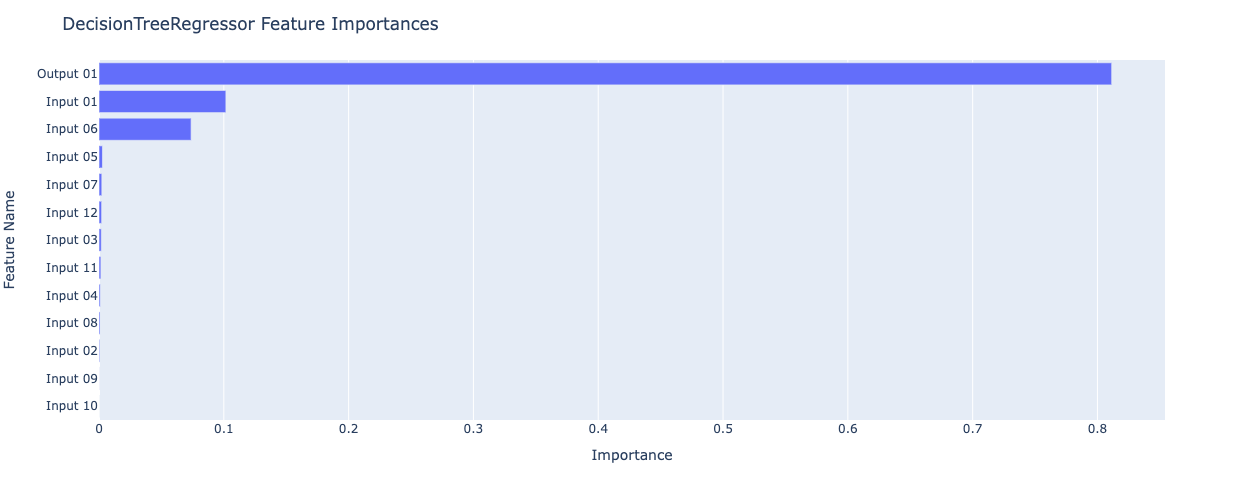

In [22]:
fig = px.bar(df_dt, x="Importance", y="Feature Name")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"DecisionTreeRegressor Feature Importances",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [23]:
df_zero.index = [f.split("_")[1] for f in df_zero.index]

In [24]:
df_merged = pd.merge(df_dt, df_zero.reset_index(), left_on="Feature Name", right_on="index")
df_merged.rename(columns = {0: "Zero_Count"}, inplace=True)
df_merged

,Feature Name,Importance,index,Zero_Count
0,Output 01,0.811424,Output 01,0
1,Input 01,0.101677,Input 01,0
2,Input 06,0.073797,Input 06,1
3,Input 05,0.002779,Input 05,455
4,Input 07,0.002279,Input 07,343
...,...,...,...,...
8,Input 04,0.000999,Input 04,286
9,Input 08,0.000819,Input 08,18
10,Input 02,0.000611,Input 02,879
11,Input 09,0.000081,Input 09,909


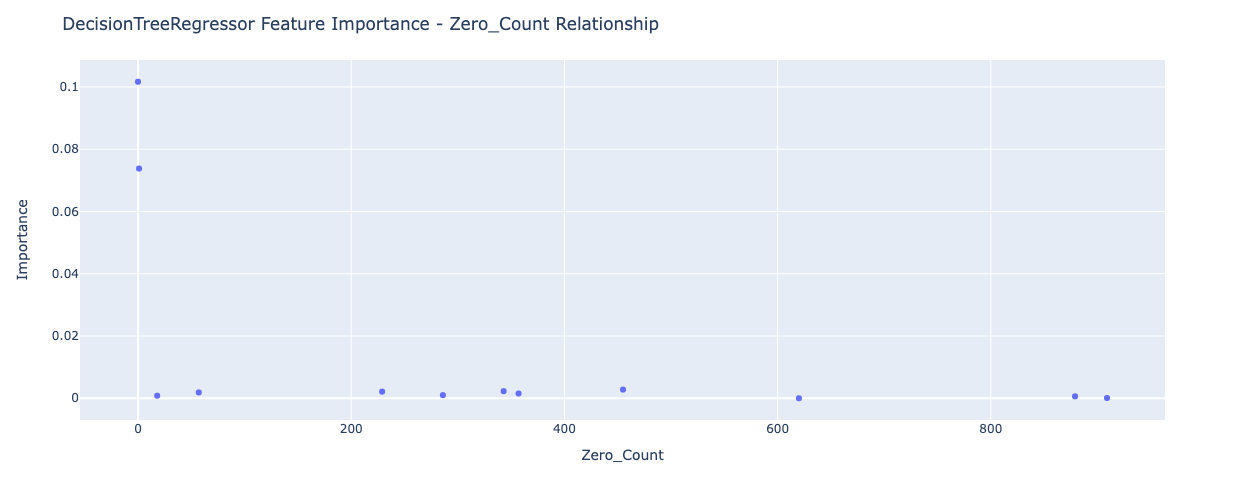

In [25]:
fig = px.scatter(df_merged[~df_merged["Feature Name"].str.contains("Output")], x="Zero_Count", y="Importance",
                hover_data=["Feature Name"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"DecisionTreeRegressor Feature Importance - Zero_Count Relationship",
)

fig.show()

In [26]:
rf_model = RandomForestRegressor(random_state=42)

pipe_rf = make_pipeline(std_scaler, rf_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe_rf, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe_rf, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe_rf, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0011052085104047969
neg_root_mean_squared_error: -0.03299247251600436
r2: 0.912530023982899


In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
print(n_estimators)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
print(max_depth)
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [28]:
# specify parameter values to search
params = {}
params['randomforestregressor__n_estimators'] = n_estimators
params['randomforestregressor__max_features'] = max_features
params['randomforestregressor__max_depth'] = max_depth
params['randomforestregressor__min_samples_split'] = min_samples_split
params['randomforestregressor__min_samples_leaf'] = min_samples_leaf
params['randomforestregressor__bootstrap'] = bootstrap

In [29]:
grid = RandomizedSearchCV(pipe_rf, params, cv=5, scoring="neg_root_mean_squared_error", random_state=0)
grid.fit(X, y.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [10,
                                                                             20,
                                                                             30,
                                                                             40,
                                                                             50,
                                                                             60,
                                

In [30]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("r2:", cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean())

-0.033250791841185075
{'randomforestregressor__n_estimators': 800, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_depth': 100, 'randomforestregressor__bootstrap': True}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_leaf=2,
                                       n_estimators=800, random_state=42))])
r2: 0.91097469957793


In [31]:
imp_rf = grid.best_estimator_.steps[1][1].feature_importances_
imp_rf

array([0.1 , 0.  , 0.01, 0.01, 0.01, 0.06, 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.78])

In [32]:
#pipe_rf.fit(X, y.values.ravel())
#
#imp_rf = pipe_rf.steps[1][1].feature_importances_

In [33]:
df_rf = pd.DataFrame({"Feature Name":X.columns, "Importance": imp_rf}).sort_values("Importance", ascending=False)
df_rf

,Feature Name,Importance
12,Output 01,0.781681
0,Input 01,0.103666
5,Input 06,0.062514
8,Input 09,0.007846
3,Input 04,0.006167
...,...,...
11,Input 12,0.004927
10,Input 11,0.004648
7,Input 08,0.004178
9,Input 10,0.003938


In [34]:
input_imp = list(df_rf.loc[df_rf["Feature Name"].str.contains("Input"), "Feature Name"].values)
results.append((grid.best_estimator_.steps[1][0], input_imp,
                {"r2" : cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean(),
                "neg_root_mean_squared_error": grid.best_score_}))

In [35]:
fig = px.bar(df_rf, x="Importance", y="Feature Name")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"RandomForestRegressor Feature Importances",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [36]:
df_merged = pd.merge(df_rf, df_zero.reset_index(), left_on="Feature Name", right_on="index")
df_merged.rename(columns = {0: "Zero_Count"}, inplace=True)
df_merged

,Feature Name,Importance,index,Zero_Count
0,Output 01,0.781681,Output 01,0
1,Input 01,0.103666,Input 01,0
2,Input 06,0.062514,Input 06,1
3,Input 09,0.007846,Input 09,909
4,Input 04,0.006167,Input 04,286
...,...,...,...,...
8,Input 12,0.004927,Input 12,229
9,Input 11,0.004648,Input 11,357
10,Input 08,0.004178,Input 08,18
11,Input 10,0.003938,Input 10,620


In [37]:
fig = px.scatter(df_merged[~df_merged["Feature Name"].str.contains("Output")], x="Zero_Count", y="Importance",
                hover_data=["Feature Name"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"RandomForestRegressor Feature Importance - Zero_Count Relationship",
)

fig.show()

In [38]:
gb_model = GradientBoostingRegressor(random_state=42)

pipe_gb = make_pipeline(std_scaler, gb_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe_gb, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe_gb, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe_gb, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0006839952729703412
neg_root_mean_squared_error: -0.02605521250963626
r2: 0.9459078761153844


In [39]:
#learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
#n_estimators = [200, 500, 1000, 2000]
#max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
#print(max_depth)
#max_depth.append(None)
## Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
## Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]

In [40]:
learning_rate = [1, 0.5, 0.1,  0.01]
n_estimators = [50, 100, 200, 500, 1000, 2000]
max_depth = [3, 5, 10, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
subsample = [0.3, 0.5, 0.75, 1.0]

In [41]:
# specify parameter values to search
params = {}
params['gradientboostingregressor__learning_rate'] = learning_rate
params['gradientboostingregressor__n_estimators'] = n_estimators
params['gradientboostingregressor__max_depth'] = max_depth
params['gradientboostingregressor__min_samples_split'] = min_samples_split
params['gradientboostingregressor__min_samples_leaf'] = min_samples_leaf
params['gradientboostingregressor__subsample'] = subsample

In [42]:
grid = RandomizedSearchCV(pipe_gb, params, cv=5, scoring="neg_root_mean_squared_error", random_state=0)
grid.fit(X, y.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingregressor',
                                              GradientBoostingRegressor(random_state=42))]),
                   param_distributions={'gradientboostingregressor__learning_rate': [1,
                                                                                     0.5,
                                                                                     0.1,
                                                                                     0.01],
                                        'gradientboostingregressor__max_depth': [3,
                                                                                 5,
                                                                                 10,
                                                                 

In [43]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("r2:", cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean())

-0.019407200891519295
{'gradientboostingregressor__subsample': 0.3, 'gradientboostingregressor__n_estimators': 500, 'gradientboostingregressor__min_samples_split': 30, 'gradientboostingregressor__min_samples_leaf': 2, 'gradientboostingregressor__max_depth': 5, 'gradientboostingregressor__learning_rate': 0.1}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=5, min_samples_leaf=2,
                                           min_samples_split=30,
                                           n_estimators=500, random_state=42,
                                           subsample=0.3))])
r2: 0.9701486177450065


In [44]:
imp_gb = grid.best_estimator_.steps[1][1].feature_importances_
imp_gb

array([0.14, 0.  , 0.01, 0.02, 0.01, 0.1 , 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.68])

In [45]:
#pip_gb.fit(X, y.values.ravel())
#
#imp_gb = pip_gb.steps[1][1].feature_importances_

In [46]:
df_gb = pd.DataFrame({"Feature Name":X.columns, "Importance": imp_gb}).sort_values("Importance", ascending=False)
df_gb

,Feature Name,Importance
12,Output 01,0.679949
0,Input 01,0.142492
5,Input 06,0.097117
3,Input 04,0.015000
11,Input 12,0.014007
...,...,...
6,Input 07,0.006303
10,Input 11,0.006188
8,Input 09,0.005791
9,Input 10,0.003837


In [47]:
input_imp = list(df_gb.loc[df_gb["Feature Name"].str.contains("Input"), "Feature Name"].values)
results.append((grid.best_estimator_.steps[1][0], input_imp,
                {"r2" : cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean(),
                "neg_root_mean_squared_error": grid.best_score_}))

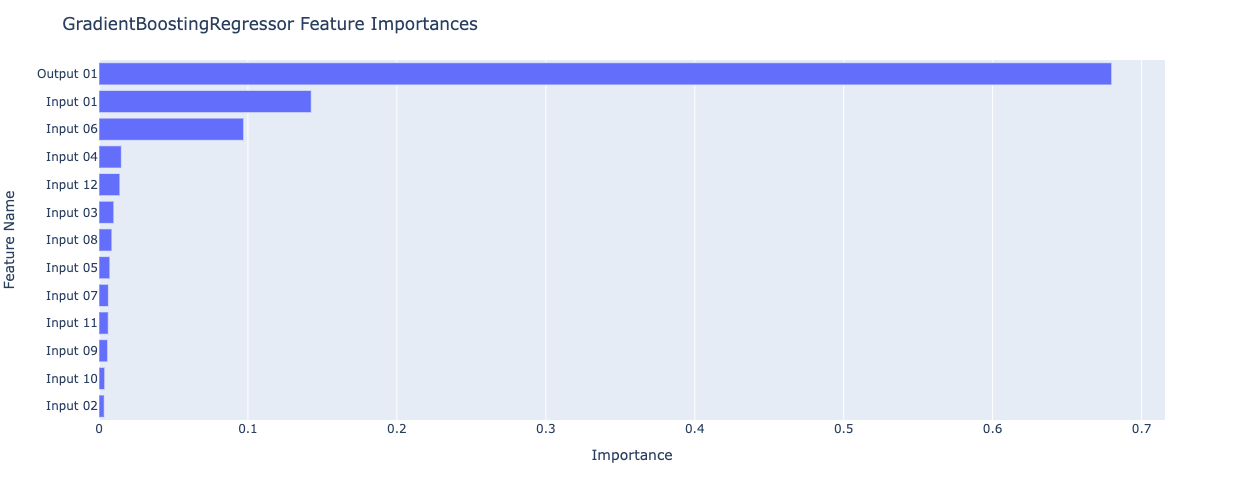

In [48]:
fig = px.bar(df_gb, x="Importance", y="Feature Name")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"GradientBoostingRegressor Feature Importances",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [49]:
df_merged = pd.merge(df_gb, df_zero.reset_index(), left_on="Feature Name", right_on="index")
df_merged.rename(columns = {0: "Zero_Count"}, inplace=True)
df_merged

,Feature Name,Importance,index,Zero_Count
0,Output 01,0.679949,Output 01,0
1,Input 01,0.142492,Input 01,0
2,Input 06,0.097117,Input 06,1
3,Input 04,0.015000,Input 04,286
4,Input 12,0.014007,Input 12,229
...,...,...,...,...
8,Input 07,0.006303,Input 07,343
9,Input 11,0.006188,Input 11,357
10,Input 09,0.005791,Input 09,909
11,Input 10,0.003837,Input 10,620


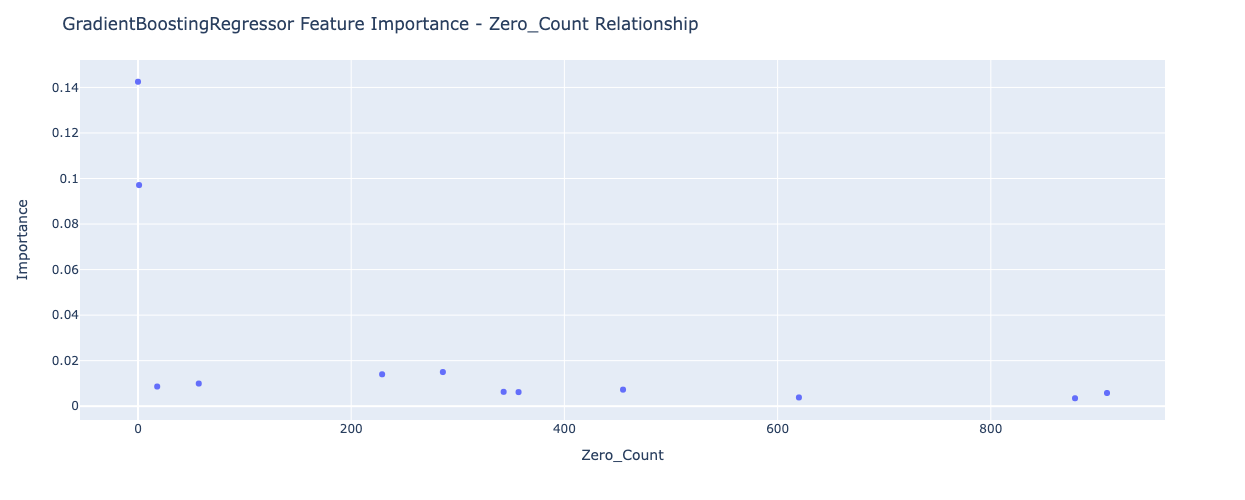

In [50]:
fig = px.scatter(df_merged[~df_merged["Feature Name"].str.contains("Output")], x="Zero_Count", y="Importance",
                hover_data=["Feature Name"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"GradientBoostingRegressor Feature Importance - Zero_Count Relationship",
)

fig.show()

In [51]:
model = grid.best_estimator_.fit(X_train, y_train.values.ravel())
prediction = model.predict(X_test)

In [52]:
res = pd.DataFrame()
res["Prediction"] = pd.Series(prediction.ravel())
res["Actual"] = y_test.values
res["Diff"] = res.Prediction - res.Actual
res["Error_Perc"] = ((res.Prediction - res.Actual) / res.Actual) * 100 
res["Error_Perc < 3"] = np.abs(res["Error_Perc"]) < 3  
res = res.round(4)
res.index = X_test.index
res

,Prediction,Actual,Diff,Error_Perc,Error_Perc < 3
DMU 0522,0.6190,0.6226,-0.0035,-0.5691,True
DMU 0738,0.6010,0.5860,0.0150,2.5591,True
DMU 0741,0.8338,0.8293,0.0046,0.5490,True
DMU 0661,0.8334,0.8323,0.0011,0.1265,True
DMU 0412,0.7148,0.7260,-0.0112,-1.5379,True
...,...,...,...,...,...
DMU 0409,0.7738,0.7625,0.0113,1.4806,True
DMU 0333,0.8290,0.8005,0.0285,3.5559,False
DMU 0209,0.7989,0.7902,0.0087,1.1064,True
DMU 0614,0.7942,0.8025,-0.0083,-1.0386,True


In [53]:
blue = res["Error_Perc < 3"].sum()
print(blue)
red = len(res["Error_Perc < 3"]) - (res["Error_Perc < 3"].sum())
red

163


37

In [54]:
rho, p = stats.spearmanr(res.Prediction, res.Actual)
print("rho:", rho.round(4)) 
print("p-Value", p.round(4)) 

rho: 0.9822
p-Value 0.0


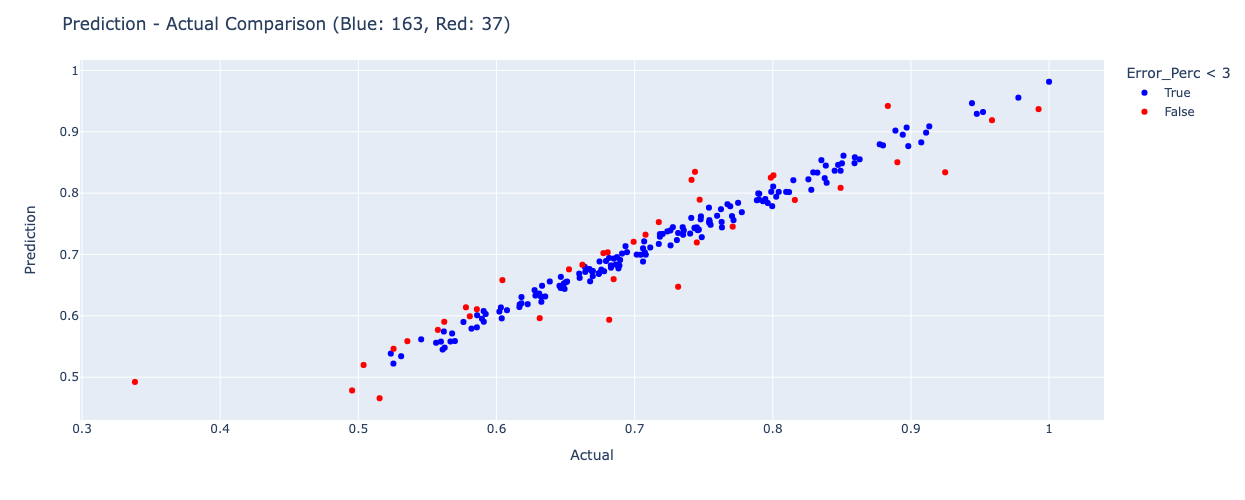

In [55]:
fig = px.scatter(res.reset_index().rename(columns={'index': 'DMU'}), x="Actual", y="Prediction", color = "Error_Perc < 3", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Actual", "Prediction", "Error_Perc", "DMU"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Prediction - Actual Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

In [56]:
xgb_model = xgb.XGBRegressor(random_state=42)

pipe_xgb = make_pipeline(std_scaler, xgb_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe_xgb, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe_xgb, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe_xgb, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0008908318258465124
neg_root_mean_squared_error: -0.029673398286169755
r2: 0.9296227164904982


In [57]:
# xgb.plot_tree(xgb_model,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

In [58]:
learning_rate = [0.01, 0.1, 0.2, 0.3]
n_estimators = [100, 500, 1000]
max_depth =  [3, 5, 6, 10, 15, 20]
subsample = np.arange(0.5, 1.0, 0.1)
colsample_bytree = np.arange(0.4, 1.0, 0.1)
colsample_bylevel = np.arange(0.4, 1.0, 0.1)

In [59]:
# specify parameter values to search
params = {}
params['xgbregressor__learning_rate'] = learning_rate
params['xgbregressor__n_estimators'] = n_estimators
params['xgbregressor__max_depth'] = max_depth
params['xgbregressor__subsample'] = subsample
params['xgbregressor__colsample_bytree'] = colsample_bytree
params['xgbregressor__colsample_bylevel'] = colsample_bylevel

In [60]:
grid = RandomizedSearchCV(pipe_xgb, params, cv=5, scoring="neg_root_mean_squared_error", random_state=0)
grid.fit(X, y.values.ravel())

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           enable_categorical=False,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type=None,
                                                           interaction_constrai

In [61]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("r2:", cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean())

-0.033123841180952705
{'xgbregressor__subsample': 0.5, 'xgbregressor__n_estimators': 500, 'xgbregressor__max_depth': 6, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__colsample_bytree': 0.7, 'xgbregressor__colsample_bylevel': 0.7999999999999999}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=0.7999999999999999,
                              colsample_bynode=1, colsample_bytree=0.7,
                              enable_categorical=False, gamma=0, gpu_id=-1,
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_delta_step=0, max_depth=6,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=500,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
      

In [62]:
imp_xgb = grid.best_estimator_.steps[1][1].feature_importances_
imp_xgb

array([0.07, 0.02, 0.01, 0.01, 0.01, 0.06, 0.02, 0.04, 0.03, 0.03, 0.02, 0.03, 0.66], dtype=float32)

In [63]:
df_xgb = pd.DataFrame({"Feature Name":X.columns, "Importance": imp_xgb}).sort_values("Importance", ascending=False)
df_xgb

,Feature Name,Importance
12,Output 01,0.656555
0,Input 01,0.073814
5,Input 06,0.060799
7,Input 08,0.035693
8,Input 09,0.033611
...,...,...
10,Input 11,0.015548
6,Input 07,0.015471
2,Input 03,0.013944
3,Input 04,0.013379


In [64]:
input_imp = list(df_xgb.loc[df_xgb["Feature Name"].str.contains("Input"), "Feature Name"].values)
results.append((grid.best_estimator_.steps[1][0], input_imp,
                {"r2" : cross_val_score(grid.best_estimator_, X, y.values.ravel(), scoring="r2").mean(),
                "neg_root_mean_squared_error": grid.best_score_}))

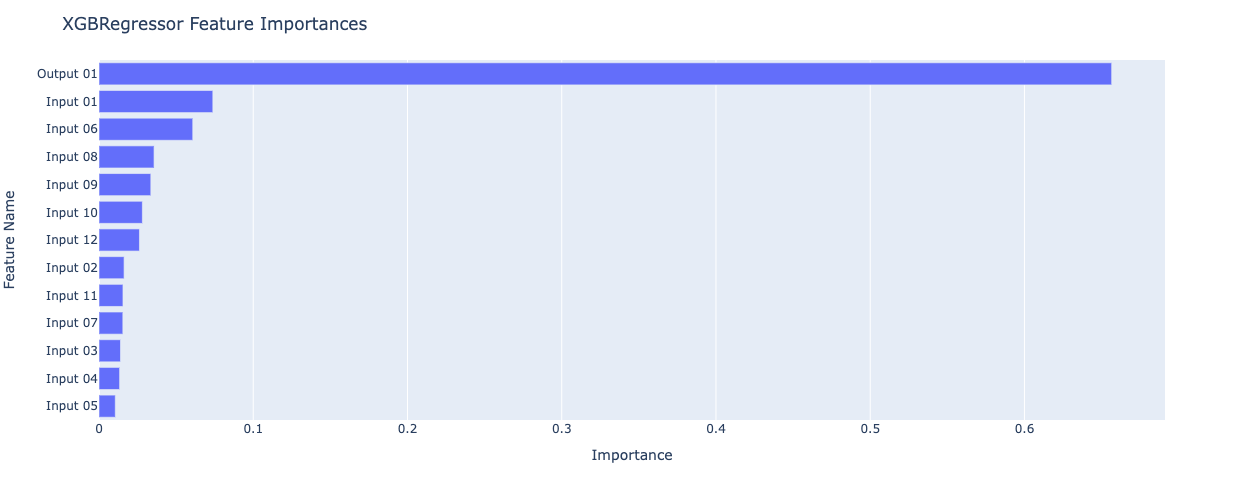

In [65]:
fig = px.bar(df_xgb, x="Importance", y="Feature Name")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"XGBRegressor Feature Importances",
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [66]:
df_merged = pd.merge(df_xgb, df_zero.reset_index(), left_on="Feature Name", right_on="index")
df_merged.rename(columns = {0: "Zero_Count"}, inplace=True)
df_merged

,Feature Name,Importance,index,Zero_Count
0,Output 01,0.656555,Output 01,0
1,Input 01,0.073814,Input 01,0
2,Input 06,0.060799,Input 06,1
3,Input 08,0.035693,Input 08,18
4,Input 09,0.033611,Input 09,909
...,...,...,...,...
8,Input 11,0.015548,Input 11,357
9,Input 07,0.015471,Input 07,343
10,Input 03,0.013944,Input 03,57
11,Input 04,0.013379,Input 04,286


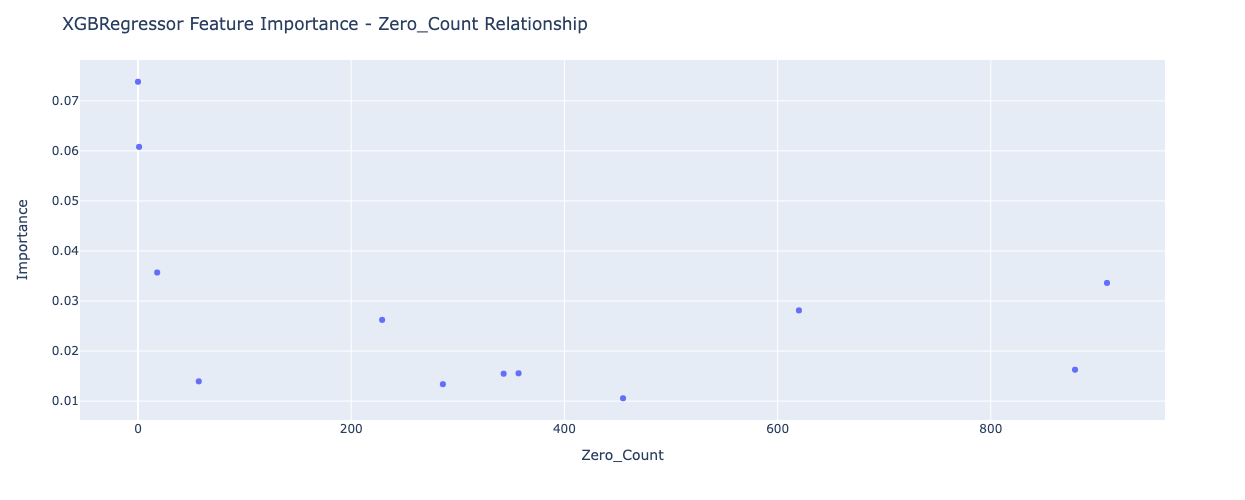

In [67]:
fig = px.scatter(df_merged[~df_merged["Feature Name"].str.contains("Output")], x="Zero_Count", y="Importance",
                hover_data=["Feature Name"])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"XGBRegressor Feature Importance - Zero_Count Relationship",
)

fig.show()

In [68]:
pipe_xgb.fit(X, y.values.ravel())

pipe_xgb.steps[1][1].feature_importances_

array([0.08, 0.  , 0.  , 0.01, 0.01, 0.06, 0.  , 0.01, 0.01, 0.  , 0.01, 0.01, 0.81], dtype=float32)

In [69]:
pipe_xgb.steps[1][1].get_booster().get_score(importance_type='cover')

{'f0': 157.82843017578125,
 'f1': 117.20083618164062,
 'f2': 194.1917266845703,
 'f3': 144.04129028320312,
 'f4': 183.61375427246094,
 'f5': 175.94444274902344,
 'f6': 148.0,
 'f7': 171.94219970703125,
 'f8': 132.82098388671875,
 'f9': 167.60946655273438,
 'f10': 132.72799682617188,
 'f11': 189.0157928466797,
 'f12': 274.6165771484375}

In [70]:
plt.rcParams['figure.figsize'] = [12, 10]

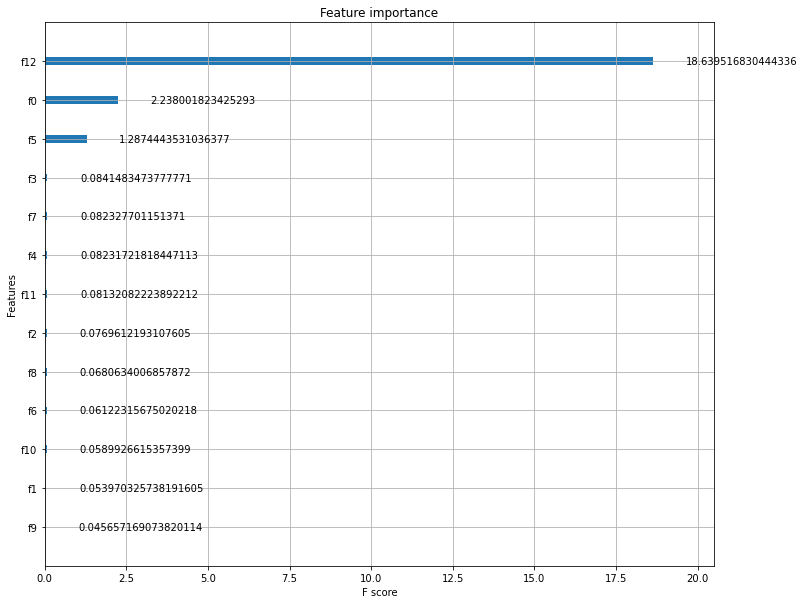

In [71]:
xgb.plot_importance(pipe_xgb.steps[1][1]._Booster, importance_type='total_gain')
plt.show()

In [72]:
results

[('decisiontreeregressor',
  ['Input 01',
   'Input 06',
   'Input 05',
   'Input 07',
   'Input 12',
   'Input 03',
   'Input 11',
   'Input 04',
   'Input 08',
   'Input 02',
   'Input 09',
   'Input 10'],
  {'r2': 0.833648477203927,
   'neg_root_mean_squared_error': -0.04566507577856786}),
 ('randomforestregressor',
  ['Input 01',
   'Input 06',
   'Input 09',
   'Input 04',
   'Input 03',
   'Input 05',
   'Input 07',
   'Input 12',
   'Input 11',
   'Input 08',
   'Input 10',
   'Input 02'],
  {'r2': 0.91097469957793,
   'neg_root_mean_squared_error': -0.033250791841185075}),
 ('gradientboostingregressor',
  ['Input 01',
   'Input 06',
   'Input 04',
   'Input 12',
   'Input 03',
   'Input 08',
   'Input 05',
   'Input 07',
   'Input 11',
   'Input 09',
   'Input 10',
   'Input 02'],
  {'r2': 0.9701486177450065,
   'neg_root_mean_squared_error': -0.019407200891519295}),
 ('xgbregressor',
  ['Input 01',
   'Input 06',
   'Input 08',
   'Input 09',
   'Input 10',
   'Input 12',
   '

In [73]:
with open('result_12I1O_3.pkl', 'wb') as f:
    pickle.dump(results, f)

In [74]:
with open('result_12I1O_3.pkl', 'rb') as f:
    r = pickle.load(f)

In [75]:
r

[('decisiontreeregressor',
  ['Input 01',
   'Input 06',
   'Input 05',
   'Input 07',
   'Input 12',
   'Input 03',
   'Input 11',
   'Input 04',
   'Input 08',
   'Input 02',
   'Input 09',
   'Input 10'],
  {'r2': 0.833648477203927,
   'neg_root_mean_squared_error': -0.04566507577856786}),
 ('randomforestregressor',
  ['Input 01',
   'Input 06',
   'Input 09',
   'Input 04',
   'Input 03',
   'Input 05',
   'Input 07',
   'Input 12',
   'Input 11',
   'Input 08',
   'Input 10',
   'Input 02'],
  {'r2': 0.91097469957793,
   'neg_root_mean_squared_error': -0.033250791841185075}),
 ('gradientboostingregressor',
  ['Input 01',
   'Input 06',
   'Input 04',
   'Input 12',
   'Input 03',
   'Input 08',
   'Input 05',
   'Input 07',
   'Input 11',
   'Input 09',
   'Input 10',
   'Input 02'],
  {'r2': 0.9701486177450065,
   'neg_root_mean_squared_error': -0.019407200891519295}),
 ('xgbregressor',
  ['Input 01',
   'Input 06',
   'Input 08',
   'Input 09',
   'Input 10',
   'Input 12',
   '

In [76]:
ft_imp  = df_dt.set_index("Feature Name").join(df_rf.set_index("Feature Name"), rsuffix="_rf").join(df_gb.set_index("Feature Name"), rsuffix="_gb").join(df_xgb.set_index("Feature Name"), rsuffix="_xgb")
ft_imp

,Importance,Importance_rf,Importance_gb,Importance_xgb
Feature Name,,,,
Output 01,0.811424,0.781681,0.679949,0.656555
Input 01,0.101677,0.103666,0.142492,0.073814
Input 06,0.073797,0.062514,0.097117,0.060799
Input 05,0.002779,0.005614,0.007262,0.010567
Input 07,0.002279,0.005270,0.006303,0.015471
...,...,...,...,...
Input 04,0.000999,0.006167,0.015000,0.013379
Input 08,0.000819,0.004178,0.008632,0.035693
Input 02,0.000611,0.003855,0.003485,0.016268


In [77]:
ft_imp.to_excel("Data/US12I1O_ft_imp_3.xlsx")